In [1]:
import numpy as np
from numpy.linalg import inv
from numpy.linalg import cond
from numpy.linalg import solve
from numpy.linalg import norm
from scipy.linalg import hilbert
from scipy.linalg import solve_triangular
 
#zad 1
 
A = np.array([[1,1],[1,1.0001]])
b1 = np.array([[2], [2.0001]])
b2 = np.array([[2], [2]])
 
wspolczynnik = cond(A)
print("wspolczynnik uwarunkowania macierzy A: ",wspolczynnik)
 
x1 = inv(A) @ b1
x2 = inv(A) @ b2
 
print("dla b1:")
print(x1)
print("dla b2:")
print(x2)

# Otrzymane rozwiązanie jest niestabilne. Oznacza to, że mała zmiana wartości współczynników może znacząco wpłynąć na wynik.


wspolczynnik uwarunkowania macierzy A:  40002.0000749
dla b1:
[[ 1.]
 [ 1.]]
dla b2:
[[ 2.]
 [ 0.]]


In [2]:
#zad 2
 
macierzH = hilbert(8)
#print(macierzH)
wsp_kol = cond(macierzH,np.inf)
wsp_spek = cond(macierzH,1)
wsp_wier = cond(macierzH,2)
 
print("współczynnik uwarunkowania(norma kolumnowa): ",wsp_kol)
print("współczynnik uwarunkowania(norma spektralna): ",wsp_spek)
print("współczynnik uwarunkowania(norma wierszowa): ",wsp_wier)

#Macierz Hilberta jest podręcznikowym przykładem macierzy źle uwarunkowanej. 
#Numerycznie rozwiązywanie nawet niewielkich układów równań z tą macierzą jest zatem praktycznie niemożliwe.(Wikipedia)
 


współczynnik uwarunkowania(norma kolumnowa):  33872790819.5
współczynnik uwarunkowania(norma spektralna):  33872790820.2
współczynnik uwarunkowania(norma wierszowa):  15257575617.1


In [3]:
#zad3
import math
import time
n = 20
t = np.linspace(0,1,n)
#t.shape = (n,1)
b = np.array([math.cos(4*x) for x in t])   
b.shape = (n,1)

A = np.fliplr(np.vander(t))

start = time.clock()      
solve_wynik = solve(A,b)
end = time.clock()
print("Metoda solve: ",end-start," sekund")

#QRx = b
#Rx = Q^T * b
#Rx = y
start = time.clock()      
q,r = np.linalg.qr(A)
y = np.matrix.transpose(q) @ b 
qr_wynik = solve_triangular(r,y)
end = time.clock()
print("Rozkład QR: ",end-start," sekund")

start = time.clock()      
lstsq_wynik = np.linalg.lstsq(A,b)[0]
end = time.clock()
print("metoda rozwiązywania układów równań z macierzą prostokątną: ",end-start," sekund")

Metoda solve:  0.0005655799143218238  sekund
Rozkład QR:  0.16642753191047013  sekund
metoda rozwiązywania układów równań z macierzą prostokątną:  0.0029044956422306922  sekund


In [4]:
norma_solve = norm(b - A @ solve_wynik)
norma_qr = norm(b - A @ qr_wynik)
norma_lstsq = norm(b - A @ lstsq_wynik)
print(norma_solve)
print(norma_qr)
print(norma_lstsq)

1.86174545009e-15
3.8824088034e-15
2.50039573319e-14


wspolczynnik uwarunkowania dla tau =  0.01  wynosi  1.06733103681
wspolczynnik uwarunkowania dla tau =  0.05  wynosi  1.82400425531
wspolczynnik uwarunkowania dla tau =  0.1  wynosi  10.1413870434
wspolczynnik uwarunkowania dla tau =  0.2  wynosi  1030.2521331
wspolczynnik uwarunkowania dla tau =  0.5  wynosi  1335.82046811
wspolczynnik uwarunkowania dla tau =  0.75  wynosi  775.697881413


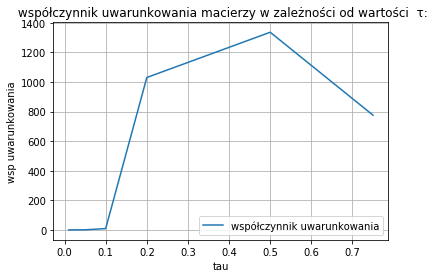

In [22]:
#zad4
import matplotlib.pyplot as plt

tau = [0.01,0.05,0.1,0.2,0.5,0.75]

s = np.random.uniform(-1,1.0,250000).reshape((500,500))



def stworz_macierz(tau):
    jedynkowa = np.ones((500,500))
    jednostkowa = np.diag(np.diag(jedynkowa)).reshape((500,500))
    dol = np.tril(s, -1).reshape((500,500))
    gora = np.matrix.transpose(dol)
    macierz = dol+gora+jednostkowa
    for i in range(500):
        for j in range(500):
            if i!=j and abs(macierz[i][j]) > tau:
                macierz[i][j] = 0
    return macierz

wektor = np.random.uniform(-1,1.0,500).reshape((500,1))
wsp_uwarunkowania = []
macierze = []

for t in tau:
    m = stworz_macierz(t)
    macierze.append(m)
    wsp_uwarunkowania.append(cond(m))
    print("wspolczynnik uwarunkowania dla tau = ",t," wynosi ",cond(m))

plt.plot(tau,wsp_uwarunkowania,label="współczynnik uwarunkowania")
plt.title(' współczynnik uwarunkowania macierzy w zależności od wartości  τ:')
plt.xlabel('tau')
plt.ylabel('wsp uwarunkowania')
plt.grid()
plt.legend()
plt.show()



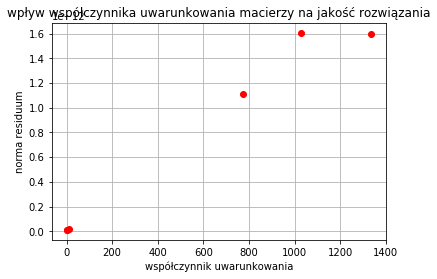

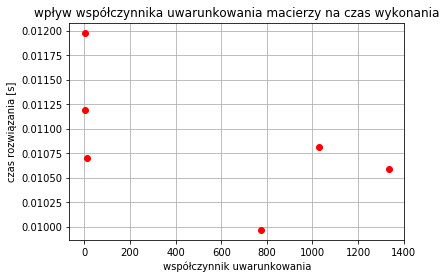

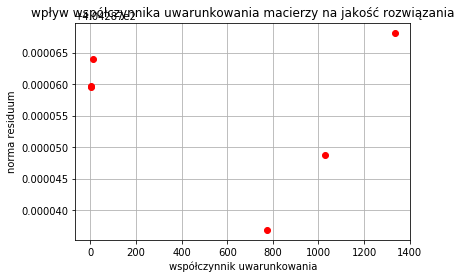

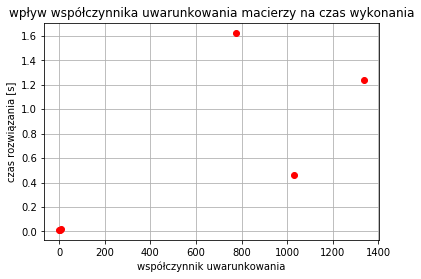

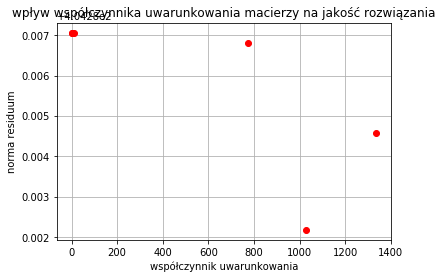

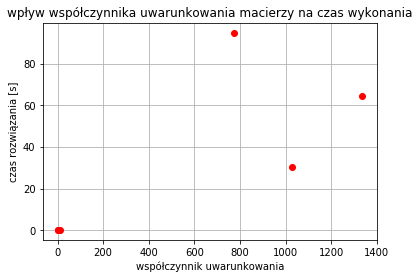

In [54]:
from scipy.sparse.linalg import bicg
from scipy.sparse.linalg import gmres
from scipy.sparse import csr_matrix

jakosc_solve = []
jakosc_bicg = []
jakosc_gmres = []

czas_solve = []
czas_bicg = []
czas_gmres = []


for m in macierze:
    #solve
    start = time.clock()
    solve(m,wektor)
    end = time.clock()
    czas_solve.append(end-start)
    jakosc_solve.append(norm(wektor - m @ solve(m,wektor)))
    #bicg
    start = time.clock()      
    x1,z = bicg(csr_matrix(m),wektor)
    end = time.clock()
    czas_bicg.append(end-start)
    jakosc_bicg.append(norm(wektor - csr_matrix(m) @ x1))
    #gmres
    start = time.clock()      
    x2,z = gmres(csr_matrix(m),wektor)
    end = time.clock()
    czas_gmres.append(end-start)
    jakosc_gmres.append(norm(wektor - csr_matrix(m) @ x2))
    
    
plt.plot(wsp_uwarunkowania,jakosc_solve,'ro')
plt.title('wpływ współczynnika uwarunkowania macierzy na jakość rozwiązania dla funkcji solve')
plt.xlabel('współczynnik uwarunkowania')
plt.ylabel('norma residuum')
plt.grid()
plt.legend()
plt.show()

plt.plot(wsp_uwarunkowania,czas_solve,'ro')
plt.title('wpływ współczynnika uwarunkowania macierzy na czas wykonania dla funkcji solve')
plt.xlabel('współczynnik uwarunkowania')
plt.ylabel('czas rozwiązania [s]')
plt.grid()
plt.legend()
plt.show()

plt.plot(wsp_uwarunkowania,jakosc_bicg,'ro')
plt.title('wpływ współczynnika uwarunkowania macierzy na jakość rozwiązania dla funkcji bicg')
plt.xlabel('współczynnik uwarunkowania')
plt.ylabel('norma residuum')
plt.grid()
plt.legend()
plt.show()

plt.plot(wsp_uwarunkowania,czas_bicg,'ro')
plt.title('wpływ współczynnika uwarunkowania macierzy na czas wykonania dla funkcji bicg')
plt.xlabel('współczynnik uwarunkowania')
plt.ylabel('czas rozwiązania [s]')
plt.grid()
plt.legend()
plt.show()

plt.plot(wsp_uwarunkowania,jakosc_gmres,'ro')
plt.title('wpływ współczynnika uwarunkowania macierzy na jakość rozwiązania dla funkcji gmres')
plt.xlabel('współczynnik uwarunkowania')
plt.ylabel('norma residuum')
plt.grid()
plt.legend()
plt.show()

plt.plot(wsp_uwarunkowania,czas_gmres,'ro')
plt.title('wpływ współczynnika uwarunkowania macierzy na czas wykonania dla funkcji gmres')
plt.xlabel('współczynnik uwarunkowania')
plt.ylabel('czas rozwiązania [s]')
plt.grid()
plt.legend()
plt.show()





In [83]:
#zad 5
def gauss(A, b, x, n):
 
    L = np.tril(A,-1)
    D = np.diag(np.diag(A))
    U = A - L - D
    for i in range(n):
        x = np.dot(inv(D),b) - np.dot(np.dot(inv(D),L),x) - np.dot(np.dot(inv(D),U),x)
    return x

n=100
 
A = np.array([[1,0],[3,4]])
b = np.array([2,2])
x = np.array([0, 0])
 
print(gauss(A,b,x,n))
print(solve(A,b))


A = np.array([[1,2,3],[2,1,3],[3,2,1]])
b = np.array([1,2,0])
x = np.array([0,0,0])

wynik = gauss(A,b,x,n)
print(wynik)
print(norm(b - A @ wynik))
#rozwiązanie jest z dużą niedokładnościa, poniewaz norma residuum jest wysoka


[ 2. -1.]
[ 2. -1.]
[ -1.19737816e+69  -1.19737816e+69  -1.19737816e+69]
1.2443518851e+70
